# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [3]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [4]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [5]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

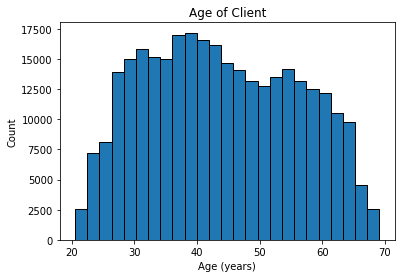

In [20]:
app_train['DAYS_BIRTH_WITH_YEAR'] = app_train['DAYS_BIRTH'] / 365
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [6]:
data = app_train['AMT_CREDIT'].head()
print(data)

0     406597.5
1    1293502.5
2     135000.0
3     312682.5
4     513000.0
Name: AMT_CREDIT, dtype: float64


In [11]:
bins= [0,100000,150000,200000,500000,1000000,1500000,2000000]
app_train['AMT_CREDIT_with_CREDIT'] = pd.cut(app_train['AMT_CREDIT'],bins=bins);
print(app_train['AMT_CREDIT_with_CREDIT'])

0           (200000, 500000]
1         (1000000, 1500000]
2           (100000, 150000]
3           (200000, 500000]
4          (500000, 1000000]
5           (200000, 500000]
6         (1500000, 2000000]
7         (1500000, 2000000]
8         (1000000, 1500000]
9           (200000, 500000]
10         (500000, 1000000]
11          (100000, 150000]
12               (0, 100000]
13         (500000, 1000000]
14         (500000, 1000000]
15          (200000, 500000]
16         (500000, 1000000]
17          (200000, 500000]
18          (150000, 200000]
19         (500000, 1000000]
20          (200000, 500000]
21        (1000000, 1500000]
22          (200000, 500000]
23          (200000, 500000]
24          (200000, 500000]
25          (200000, 500000]
26         (500000, 1000000]
27          (200000, 500000]
28         (500000, 1000000]
29          (150000, 200000]
                 ...        
307481      (200000, 500000]
307482     (500000, 1000000]
307483      (200000, 500000]
307484     (50

In [12]:
app_train["AMT_CREDIT_with_CREDIT"].value_counts()

(200000, 500000]      113189
(500000, 1000000]     108193
(1000000, 1500000]     39229
(150000, 200000]       17985
(100000, 150000]       12155
(1500000, 2000000]      8727
(0, 100000]             6004
Name: AMT_CREDIT_with_CREDIT, dtype: int64